# Additional Features

__Task1-EDA-Insights: Feature Selection & Reduction #5__

Addition of features (scores saber pro, saber 11, progress of exam, speciality in Engg, group the speciality).

Topics:
- Wrangle Departmente and Municipality text
- Clean data on Career field
- 

## Initial step
Import libraries, load and translate dataset.

In [1]:
# Import libraries

# basic libraries
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
# import ast
pd.set_option('display.max_rows', 500) # to show more rows.

# for translation
import sys
sys.path.append('../')
from Translate_data import translate_data

# to plot
import altair as alt
alt.renderers.enable('mimetype')

# root to call the data 
root = "../../../data/"

In [2]:
# Load Data
df_raw = pd.read_csv(root + 'saber_combined_all_fields.csv')
df_raw = df_raw.drop(columns = 'Unnamed: 0')
df_raw.head(3)

,estu_tipodocumento,estu_nacionalidad,estu_genero,estu_fechanacimiento,estu_exterior,periodo,estu_consecutivo,estu_estadocivil,estu_estudiante,estu_pais_reside,...,punt_biologia,punt_quimica,punt_fisica,punt_ciencias_sociales,punt_filosofia,punt_ingles,desemp_ingles,profundiza,puntaje_prof,desemp_prof
0,TI,COLOMBIA,M,30/07/1996,NaN,20134,EK201340233804,Soltero,ESTUDIANTE,COLOMBIA,...,39.0,42.0,33.0,33.0,29.0,38.0,A-,PUNT_INTERDISC_MEDIOAMBIENTE,49.0,NaN
1,CC,COLOMBIA,M,13/04/1994,NaN,20133,EK201330220754,Soltero,ESTUDIANTE,COLOMBIA,...,52.0,52.0,54.0,44.0,47.0,51.0,A1,PUNT_PROFUNDIZA_LENGUAJE,6.0,II
2,CC,COLOMBIA,F,08/12/1991,NaN,20134,EK201340246502,Soltero,ESTUDIANTE,COLOMBIA,...,50.0,51.0,28.0,46.0,45.0,43.0,A-,PUNT_PROFUNDIZA_BIOLOGIA,5.0,I


In [3]:
# Translate data
df = translate_data(df_raw, 'spanish', 'english')
df.head(3)

,your_type_of_document,your_nationality,your_gender,your_birthdate,your_foreigner,period,your_consecutive,your_marital_status,your_student,your_country_resides,...,score_biology_saber_11,score_chemistry_saber_11,score_physics_saber_11,score_social_science_saber_11,score_philosophy_saber_11,score_english_saber_11,score_english_saber_11_category,optative_field_saber_11,score_optative_saber_11,optative_category_saber_11
0,TI,COLOMBIA,M,30/07/1996,NaN,20134,EK201340233804,Single,STUDENT,COLOMBIA,...,39.0,42.0,33.0,33.0,29.0,38.0,A-,SCORE_INTERDISC_ENVIRONMENT,49.0,NaN
1,CC,COLOMBIA,M,13/04/1994,NaN,20133,EK201330220754,Single,STUDENT,COLOMBIA,...,52.0,52.0,54.0,44.0,47.0,51.0,A1,SCORE_DEEPEN_LANGUAGE,6.0,II
2,CC,COLOMBIA,F,08/12/1991,NaN,20134,EK201340246502,Single,STUDENT,COLOMBIA,...,50.0,51.0,28.0,46.0,45.0,43.0,A-,SCORE_DEEPEN_BIOLOGY,5.0,I


## Wrangle Departmente and Municipality text

In [4]:
# Wrangling Department

# - - - correct code - - - 
# Change code from float to int
df['your_dept_code_resides'] = df[['your_dept_code_resides']].apply(np.int64).astype(str)
df['your_dept_code_resides.1'] = df[['your_dept_code_resides.1']].apply(np.int64).astype(str)

# two-digit code for Department (Colombian States)
df['your_dept_code_resides'] = ["0"+i if len(i)==1 else i for i in df['your_dept_code_resides']]
df['your_dept_code_resides.1'] = ["0"+i if len(i)==1 else i for i in df['your_dept_code_resides.1']]


In [5]:
# Wrangling Municipality

# - - - correct name - - - 
import re
municipality_list = list(df['cole_municipality_location'].unique()) + \
                    list(df['your_municipality_resides'].unique()) + \
                    list(df['your_inst_municipality'].unique()) + \
                    list(df['your_municipality_resides.1'].unique())

municipality_list = pd.DataFrame(data=municipality_list, columns=['Name'])#.unique()
municipality_list = list(municipality_list.Name.unique())
municipality_list = [str(i) for i in municipality_list]
municipality_list = sorted(municipality_list)
municipality_values = sorted(municipality_list)

municipality_values = [re.sub(r'BOGOTÁ, D.C.', 'BOGOTÁ D.C.', mun) for mun in municipality_values]
municipality_values = [re.sub(r'CARTAGENA$', 'CARTAGENA DE INDIAS', mun) for mun in municipality_values]
municipality_values = [re.sub(r'CHIQUINQUIRA$', 'CHIQUINQUIRÁ', mun) for mun in municipality_values]
municipality_values = [re.sub(r'CIÉNEGA$', 'CIÉNAGA', mun) for mun in municipality_values]
municipality_values = [re.sub(r'PUERTO ASIS$', 'PUERTO ASÍS', mun) for mun in municipality_values]
municipality_values = [re.sub(r'POPAYAN$', 'POPAYÁN', mun) for mun in municipality_values]
municipality_values = [re.sub(r'FACATATIVÁ$', 'FACATATIVA', mun) for mun in municipality_values]

zip_iterator = zip(municipality_list, municipality_values) # Get pairs of elements
municipality_dict = dict(zip_iterator)  # Convert to dictionary

municipality_columns = ['cole_municipality_location', 'your_municipality_resides',
                        'your_inst_municipality', 'your_municipality_resides.1']

for col in municipality_columns:
    df[col] = df[col].map(municipality_dict)
    
# - - - correct code - - - 
# Change code from float to int
df['your_municipality_code_resides'] = df[['your_municipality_code_resides']].apply(np.int64).astype(str)
df['your_municipality_code_resides.1'] = df[['your_municipality_code_resides.1']].apply(np.int64).astype(str)

# two-digit code for Department (Colombian States)
df['your_municipality_code_resides'] = ["0"+i if len(i)==4 else i for i in df['your_municipality_code_resides']]
df['your_municipality_code_resides.1'] = ["0"+i if len(i)==4 else i for i in df['your_municipality_code_resides.1']]


## Clean data on Career field
I already update the translation of the `your_undergraduate_core` values, to correct labels that are the same or similar, i.e.:
- `AGRICULTURAL, FORESTRY ENGINEERING` vs. `AGRICULTURAL, FOREST ENGINEERING`
- `TRAINING RELATED TO THE MILITARY OR POLICE FIELD` vs. `MILITARY OR POLICE TRAINING`
- `NUTRITION AND DIETETICS` vs. `NUTRITION AND DIET`

In [6]:
sorted(df['your_undergraduate_core'].unique().astype(str))

['ADMINISTRATION',
 'ADMINISTRATIVE ENGINEERING',
 'ADVERTISING',
 'AGRICULTURAL, FORESTRY ENGINEERING',
 'AGROINDUSTRIAL AND FOOD ENGINEERING',
 'AGRONOMIC AND LIVESTOCK ENGINEERING',
 'AGRONOMY',
 'ANTHROPOLOGY, LIBERAL ARTS',
 'ARCHITECTURE',
 'BACTERIOLOGY',
 'BIOLOGY, MICROBIOLOGY',
 'BIOMEDICAL ENGINEERING',
 'CHEMICAL ENGINEERING',
 'CHEMISTRY',
 'CIVIL ENGINEERING',
 'COMPUTER SYSTEMS, TELEMATICS ENGINEERING',
 'DENTISTRY',
 'DESIGN',
 'ECONOMY',
 'EDUCATION',
 'ELECTRICAL ENGINEERING',
 'ELECTRONIC ENGINEERING, TELECOMMUNICATIONS',
 'ENVIRONMENTAL, SANITARY ENGINEERING',
 'GEOGRAPHY, HISTORY',
 'GEOLOGY, OTHER NATURAL SCIENCE PROGRAMS',
 'INDUSTRIAL ENGINEERING',
 'LAW',
 'LIBRARY, OTHERS OF SOCIAL AND HUMAN SCIENCES',
 'MATH, STATISTICS',
 'MECHANICAL ENGINEERING',
 'MEDICINE',
 'MILITARY OR POLICE TRAINING',
 'MINING, METALLURGY ENGINEERING',
 'MODERN LANGUAGES, LITERATURE, LINGUISTICS',
 'MUSIC',
 'NURSING',
 'NUTRITION AND DIET',
 'ODONTOLOGY',
 'OPTOMETRY, OTHER HEALTH SC

## New variable for undergraduate core field
I add to categorical dictionary a variable that asigns a general field to the undergaduate core, as a dictionary named `your_undergraduate_core_field`



In [7]:
# dictionary of categorical variables
import urllib.request as urllib2
import ast
contents = str("")
for line in urllib2.urlopen("https://raw.githubusercontent.com/vcuspinera/Datasets/main/omdena/colombia-career-recommender-system/translate_cat.txt"):
    contents += str(line)[2:-3]
contents += "}"
char_to_replace = {
    "\\r": "", "\\": "", # characters
    "xc3x81": "Á", "xc3x89": "É", "xc3x8d": "Í", "xc3x93": "Ó", "xc3x9a": "Ú", "xc3x9c": "Ü", "xc3x91": "Ñ", # capital letters
    "xc3xa1": "á", "xc3xa9": "é", "xc3xad": "í", "xc3xb3": "ó", "xc3xba": "ú", "xc3xb1": "ñ" # lowercase letters
}
for key, value in char_to_replace.items():
    contents = contents.replace(key, value)
dic_cat = ast.literal_eval(contents)

In [8]:
# Add the undergraduate core field variable
df['your_undergraduate_core_field'] = df[['your_undergraduate_core']].replace(dic_cat['your_undergraduate_core_field'])

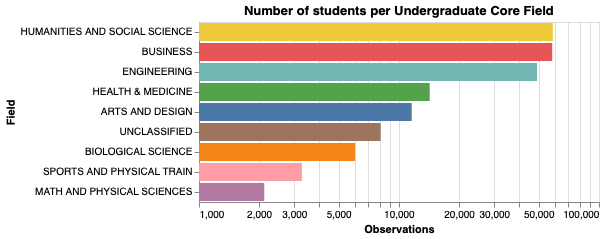

In [12]:
# plot
source = df.groupby('your_undergraduate_core_field').count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

alt.Chart(source).mark_bar().encode(
    alt.X('obs', title="Observations", scale=alt.Scale(type='log')),
    alt.Y('your_undergraduate_core_field', sort='-x', title="Field"),
    alt.Color('your_undergraduate_core_field', legend=None),
    tooltip = ['your_undergraduate_core_field', 'obs']
).properties(
    title = "Number of students per Undergraduate Core Field"
)


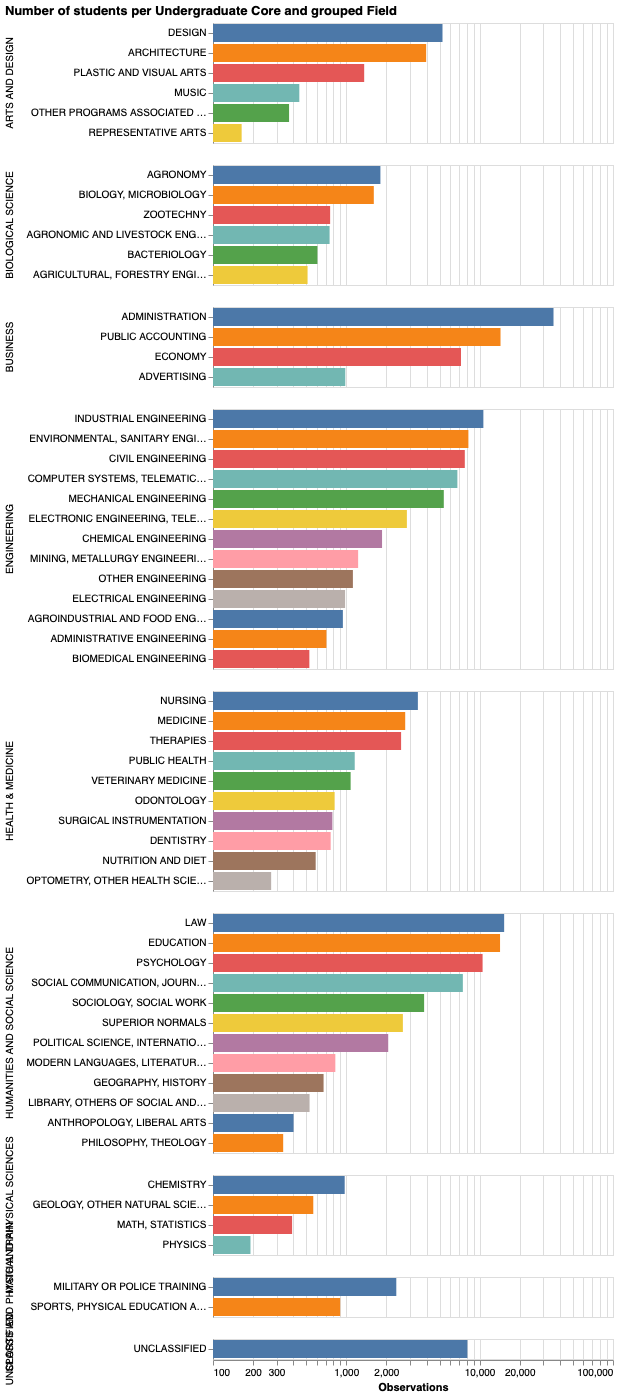

In [76]:
# plot 2
source = df.groupby(['your_undergraduate_core', 'your_undergraduate_core_field']).count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

alt.Chart(source).mark_bar().encode(
    alt.X('obs', title="Observations", scale=alt.Scale(type='log')),
    alt.Y('your_undergraduate_core', sort='-x', title=""),
    alt.Color('your_undergraduate_core', sort='-x', legend=None),
    alt.Row('your_undergraduate_core_field', title=""),
    tooltip = ['your_undergraduate_core_field', 'your_undergraduate_core', 'obs']
# ).facet(
#     row='your_undergraduate_core_field',
).properties(
    title = "Number of students per Undergraduate Core and grouped Field"
).resolve_scale(y='independent', opacity='independent', color='independent')
